#print

##print formatting

In [0]:
var_1_str = 'steve'
var_2_int = 101

{}, format을 사용해 좀더 가시성을 높여서 print해봅니다.

In [0]:
print('print {}:{}'.format(var_1_str, var_2_int))

print steve:101


천단위 comma와 소수점 둘째자리 반올림round하여 print해봅니다.

In [0]:
var_3_float = 123456789.987
print('print {:,.2f}'.format(var_3_float))

print 123,456,789.99


#datetime

In [0]:
from datetime import datetime

In [0]:
date_str = '20190722'
print(date_str)
print(type(date_str))

20190722
<class 'str'>


python에서 실제로 date를 어떻게 관리할까요? List로 처리합니다.

In [0]:
for idx, date_char in enumerate(date_str):
  print(idx, date_char)

0 2
1 0
2 1
3 9
4 0
5 7
6 2
7 2


##str을 datetime 객체로 변환

strptime 메서드를 이용해 변환해봅니다.

In [0]:
date_str = '20190722'
date_type_var = datetime.strptime(date_str, '%Y%m%d')
print(date_type_var, type(date_type_var))

2019-07-22 00:00:00 <class 'datetime.datetime'>


datetime 내 변수들에 접근해봅시다.

In [0]:
print(date_type_var.year, date_type_var.month, date_type_var.day)
print(type(date_type_var.year))

2019 7 22
<class 'int'>


##datetime 객체를 str으로 변환

strftime을 이용해 변환해봅니다.

In [0]:
date_type_var = datetime(2019,7,22)
date_str = datetime.strftime(date_type_var, '%Y%m%d')
print(date_str, type(date_str))

20190722 <class 'str'>


#lending club data

##data loading

google drive를 mount하여 load해봅시다.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls -lt '/content/gdrive/My Drive/ML_Datasets'

total 3388783
-rw------- 1 root root 1441757828 Jul 25 09:00  loan_seg_df_3.pkl
-rw------- 1 root root  836188751 Jul 23 08:49  loan_seg_df_2.pkl
-rw------- 1 root root 1189395649 Jul 23 07:38  loan.csv
-r-------- 2 root root      23594 Jul 13 09:01  LCDataDictionary.xlsx
-rw------- 1 root root    2745852 Jul 12 08:50 'Ecommerce Purchases.csv'


In [0]:
import os
folder_path = r'/content/gdrive/My Drive/ML_Datasets'
fname = 'loan.csv'
fpath = folder_path + os.sep + fname

In [0]:
import pandas as pd
from datetime import datetime

In [0]:
t1 = datetime.now()

loan_df = pd.read_csv(fpath, header=0, sep=',', 
                      index_col=False, na_filter=False, encoding='utf-8', 
                      na_values=None, keep_default_na=False)

t2 = datetime.now()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,24,25,27,30,31,33,34,49,56,57,58,59,60,61,62,64,66,67,68,69,70,71,72,73,74,75,78,79,81,82,83,84,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


data loading에 걸린 시간을 측정해봅시다.

In [0]:
file_read_sec = (t2-t1).total_seconds()
print('file reading sec : {:}초'.format(file_read_sec))
print('file records : {:}건'.format(loan_df.shape[0]))
print('file columns : {:}개'.format(loan_df.shape[1]))

file reading sec : 68.74774초
file records : 2260668건
file columns : 145개


In [0]:
loan_df.head(1)

id member_id  ...  settlement_percentage  settlement_term
0               ...                                        

[1 rows x 145 columns]

##column explanation

column을 설명해주는 excel : LCDataDictionary.xlsx

In [0]:
for col_idx, col_name in enumerate(loan_df.columns):
  print(col_name, col_idx+1)

보통 data는 최신이어도, 변수명 설명 excel은 update되어있지 않은 경우도 많으므로 실제 data와 비교하며 확인합니다. 

##setting

분석의 목적: 대출심사 시점에서 신청자의 신청정보&심사정보를 활용, 해당 대출을 실행한 후 (6개월 이후) 정상/부도 발생 가능성 예측모형을 개발합니다.

먼저, 정상/부도를 정의해야합니다.

정상 (계좌상태/loan_status)


*   Fully Paid : 완제
*   Current : 상환중
*   Does not meet the credit policy. Status:Fully Paid :규정에는 맞지 않았으나 실행되었고 완제
*   Late (16-30 days) : 짧은 연체중






해당하는 계좌상태의 count를 간단하게 확인해봅시다.

In [0]:
var_name = 'loan_status'
temp_vc_df = loan_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
print(temp_vc_df)

                                         loan_status   counts
0                                         Fully Paid  1041952
1                                            Current   919695
2                                        Charged Off   261655
3                                 Late (31-120 days)    21897
4                                    In Grace Period     8952
5                                  Late (16-30 days)     3737
6  Does not meet the credit policy. Status:Fully ...     1988
7  Does not meet the credit policy. Status:Charge...      761
8                                            Default       31


이제 정상을 data에 정의해주고, Y값으로 setting합시다.

In [0]:
good_loan_status = ['Fully Paid', 'Current', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid']
loan_df['Y'] = loan_df['loan_status'].apply(lambda x: 1 if x not in good_loan_status else 0)
#좋은 계좌상태에 있지 않은 x들을 1로, 정상인 x는 0으로 하는 부도여부 Y값 set
loan_df['Y'].value_counts()

0    1967372
1     293296
Name: Y, dtype: int64

#data preprocessing

data segmentaion: 모집단 정의

##column delete

개인대출을 신청한 사람도 있고, 공동대출을 신청한 사람도 있습니다.
분석의 편의를 위해 공동대출 record는 삭제합니다.

In [0]:
loan_seg_df = loan_df[loan_df['application_type'] == 'Individual'].copy()

심사시점에 알 수 없는 정보인 상환정보, 공동차주정보 column을 삭제합니다.

In [0]:
del_cols = [
'verification_status_joint', 'sec_app_earliest_cr_line', 'annual_inc_joint', 'dti_joint', 'revol_bal_joint', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog', 'loan_status', 'pymnt_plan', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_flag',
'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'hardship_loan_status', 'out_prncp',
'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt',
'mths_since_last_major_derog', 'hardship_amount',  'hardship_length', 'hardship_dpd', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
'recoveries', 'collection_recovery_fee',  'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',  'delinq_amnt', 'deferral_term',
'payment_plan_start_date', 'orig_projected_additional_accrued_interest', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status',
'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', ]

In [0]:
loan_seg_df.drop(columns=del_cols, inplace=True)

대출을 실행한지 얼마 되지 않은 사람도 있습니다.
분석의 편의를 위해 6개월 미만 record는 삭제합니다.

In [0]:
#신용조회일 null record 삭제
loan_seg_df = loan_seg_df[loan_seg_df['last_credit_pull_d'] != ''].copy()

In [0]:
#신용조회일 column을 str에서 datetime type으로 변환해서 추가
loan_seg_df['credit_yymmdd'] = loan_seg_df['last_credit_pull_d'].apply(lambda x: datetime.strptime(x, '%b-%Y').date())
loan_seg_df['credit_yymm'] = loan_seg_df['credit_yymmdd'].apply(lambda x: datetime.strftime(x, '%Y%m%d')[:6])

In [0]:
#신용조회한 월별로 count
var_name = 'credit_yymm'
temp_vc_df = loan_seg_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
temp_vc_df.sort_values(by=['credit_yymm'], axis=0, inplace=True, ascending=False)
temp_vc_df.head()

credit_yymm   counts
129      201903        7
0        201902  1293968
1        201901    75556
4        201812    50316
6        201811    46922

In [0]:
#신용조회일이 201903인 record를 삭제
loan_seg_df = loan_seg_df[loan_seg_df['credit_yymm'] != '201903'].copy()

In [0]:
#완제/미완제를 알 수 있는 column을 추가
curr_loan_status = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default']
loan_seg_df['loan_status_curr_fg'] = loan_seg_df['loan_status'].isin(curr_loan_status)

In [0]:
#계좌개설일 column을 datatime type으로 변환해서 추가
loan_seg_df['issue_yymmdd'] = loan_seg_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%Y').date())
loan_seg_df['issue_yymm'] = loan_seg_df['issue_yymmdd'].apply(lambda x: datetime.strftime(x, '%Y%m%d')[:6])

In [0]:
#delete filter 생성(boolean filter) : 미완제 상태이며, 2018년 8월 이전 발행된 record만 필터링
del_filter = (loan_seg_df['loan_status_curr_fg']) & (loan_seg_df['issue_yymm'] >= '201808')
loan_seg_df = loan_seg_df[~del_filter].copy()

##pickle

전처리한 data를 보존하기 위해 pickle로 저장합니다.

In [0]:
pkl_fname = 'loan_seg_df_2.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
loan_seg_df.to_pickle(pkl_fpath)

In [0]:
!ls -lt '/content/gdrive/My Drive/ML_Datasets'

total 3171025
-rw------- 1 root root  836188751 Jul 23 08:49  loan_seg_df_2.pkl
-rw------- 1 root root 1218773813 Jul 23 08:41  loan_seg_df_1.pkl
-rw------- 1 root root 1189395649 Jul 23 07:38 'loan (1).csv'
-r-------- 2 root root      23594 Jul 13 09:01  LCDataDictionary.xlsx
-rw------- 1 root root    2745852 Jul 12 08:50 'Ecommerce Purchases.csv'


##memory administration

In [0]:
#dataframe 확인
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
loan_df       DataFrame            id member_id  loa<...>60668 rows x 146 columns]
loan_seg_df   DataFrame            id member_id  loa<...>62274 rows x 151 columns]
temp_vc_df    DataFrame        credit_yymm   counts\<...>n\n[140 rows x 2 columns]


In [0]:
#삭제
del loan_df
del temp_vc_df

##pickle reading

In [0]:
import os
import pandas as pd
folder_path = r'/content/gdrive/My Drive/ML_Datasets'
pkl_fname = 'loan_seg_df_2.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
loan_seg_df = pd.read_pickle(pkl_fpath)

#data type setting

EDA: 탐색적 데이터 분석

##data type 확인

In [0]:
#describe로 numerical한 column만 봅니다.
loan_seg_df.describe()

loan_amnt   funded_amnt  ...  policy_code             Y
count  1.962274e+06  1.962274e+06  ...    1962274.0  1.962274e+06
mean   1.471914e+04  1.471308e+04  ...          1.0  1.438657e-01
std    8.951035e+03  8.948645e+03  ...          0.0  3.509536e-01
min    5.000000e+02  5.000000e+02  ...          1.0  0.000000e+00
25%    8.000000e+03  8.000000e+03  ...          1.0  0.000000e+00
50%    1.217500e+04  1.215000e+04  ...          1.0  0.000000e+00
75%    2.000000e+04  2.000000e+04  ...          1.0  0.000000e+00
max    4.000000e+04  4.000000e+04  ...          1.0  1.000000e+00

[8 rows x 8 columns]

null값이나 str값이 있는 경우, 다른 값들이 numerical한 column이라도 pandas에서는 categorical하게 인식한다.

In [0]:
#info로 모든 column의 type을 확인합니다.
loan_seg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962274 entries, 186 to 2260667
Data columns (total 95 columns):
id                                object
member_id                         object
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          float64
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        object
verification_status               object
issue_d                           object
url                               object
desc                              object
purpose                           object
title                             object
zip_code                          object
addr_state             

##data type 변환

numerical한 변수인 것 같은데, categorical하게 나타나는 변수들을 올바른 type으로 변환해봅니다.

for문으로 변환할 수도 있지만, 귀찮은 일이다. pandas의 to_numeric을 이용합니다.

In [0]:
loan_seg_df['annual_inc'] = pd.to_numeric(loan_seg_df['annual_inc'], errors='coerce').fillna(0)
#errors=coerce로 했을 때 null은 NaN값으로 대치됩니다.
#하지만 fillna를 태우면 0으로 바꿔주겠네요.
loan_seg_df.describe()
#연소득 column이 추가되었습니다.

loan_amnt   funded_amnt  ...  policy_code             Y
count  1.962274e+06  1.962274e+06  ...    1962274.0  1.962274e+06
mean   1.471914e+04  1.471308e+04  ...          1.0  1.438657e-01
std    8.951035e+03  8.948645e+03  ...          0.0  3.509536e-01
min    5.000000e+02  5.000000e+02  ...          1.0  0.000000e+00
25%    8.000000e+03  8.000000e+03  ...          1.0  0.000000e+00
50%    1.217500e+04  1.215000e+04  ...          1.0  0.000000e+00
75%    2.000000e+04  2.000000e+04  ...          1.0  0.000000e+00
max    4.000000e+04  4.000000e+04  ...          1.0  1.000000e+00

[8 rows x 9 columns]

일괄 변환해봅시다.

In [0]:
#신청정보에 대해 일괄 변환 #숫자column
app_num_cols = [
'loan_amnt',
'annual_inc',
]

#categorical 변수
app_cat_cols = [
'id', 'member_id','emp_title','home_ownership',
'url', 'desc','purpose','title','zip_code','addr_state',
'initial_list_status','policy_code','application_type','emp_length',    
]

#숫자 column에 대해 for문으로 변환
for num_col in app_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

#turn-off scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

loan_seg_df[app_num_cols].describe()

loan_amnt     annual_inc
count 1,962,274.00   1,962,274.00
mean     14,719.14      78,485.85
std       8,951.03     116,105.35
min         500.00           0.00
25%       8,000.00      47,000.00
50%      12,175.00      65,000.00
75%      20,000.00      94,000.00
max      40,000.00 110,000,000.00

In [0]:
#심사정보 일괄 변환
screen_num_cols = [
'mths_since_last_record',
'pub_rec',
'chargeoff_within_12_mths',
'pub_rec_bankruptcies',
'tax_liens',
'dti',
'open_acc',
'total_acc',
'avg_cur_bal',
'mo_sin_rcnt_tl',
'num_sats',
'num_tl_op_past_12m',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'num_op_rev_tl',
'revol_bal',
'max_bal_bc',
'num_rev_accts',
'revol_util',
'total_rev_hi_lim',
'delinq_2yrs',
'mths_since_last_delinq',
'acc_now_delinq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'inq_last_6mths',
'inq_fi',
'inq_last_12m',
'mths_since_recent_inq',
'mort_acc',
'bc_open_to_buy',
'mths_since_recent_bc',
'num_actv_bc_tl',
'num_bc_sats',
'num_bc_tl',
'mths_since_recent_bc_dlq',
'bc_util',
'percent_bc_gt_75',
'total_bc_limit',
'open_act_il',
'total_cu_tl',
'num_actv_rev_tl',
'num_rev_tl_bal_gt_0',
'open_acc_6m',
'open_rv_12m',
'open_rv_24m',
'acc_open_past_24mths',
'all_util',
'num_il_tl',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'mo_sin_old_il_acct',
'total_bal_il',
'il_util',
'total_il_high_credit_limit',
'pct_tl_nvr_dlq',
    
]
screen_cat_cols = [
'earliest_cr_line',
'grade',
'sub_grade',
'verification_status',    
]

for num_col in screen_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

In [0]:
#실행정보 일괄변환
open_num_cols = [
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'installment',    
]
open_cat_cols = [
'term',
'issue_d',
'disbursement_method',    
]

for num_col in open_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

In [0]:
# 현재까지 작업한 내용 피클파일로 저장
folder_path = r'/content/gdrive/My Drive/ML_Datasets'
pkl_fname = 'loan_seg_df_3.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print(pkl_fpath)
loan_seg_df.to_pickle(pkl_fpath)

/content/gdrive/My Drive/ML_Datasets/loan_seg_df_3.pkl


#EDA

데이터를 탐색해봅시다. #Exploration

In [0]:
#value_counts로 빈도, 분포(distribution)를 알아봅니다.
loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=False)

MORTGAGE    949381
RENT        790914
OWN         221183
ANY            563
OTHER          182
NONE            51
Name: home_ownership, dtype: int64

In [0]:
#normalize를 true로 하면 구성비(ratio)를 확인할 수 있습니다.
loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=True)

MORTGAGE   0.48
RENT       0.40
OWN        0.11
ANY        0.00
OTHER      0.00
NONE       0.00
Name: home_ownership, dtype: float64

새로운 dataframe을 만들어서 봅시다.

In [0]:
#방금 출력했던 도수분포표를 dataframe으로 만들겠습니다.
#axis column의 이름을 입력하고, index였던 주거를 value로 주고 새로운 index를 만듭니다. 도수는 counts라는 column으로 합니다.
ho_freq = loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=False).rename_axis(index='home_ownership').reset_index(name='counts')
ho_freq

home_ownership  counts
0       MORTGAGE  949381
1           RENT  790914
2            OWN  221183
3            ANY     563
4          OTHER     182
5           NONE      51

##binning

In [0]:
#bin을 만들어 도수분포를 원하는 구간별로 쪼개서 보겠습니다.
la_freq = loan_seg_df['loan_amnt'].value_counts(dropna=False, normalize=False, bins=10).rename_axis(index='loan_amnt').reset_index(name='counts')
la_freq

loan_amnt  counts
0   (8400.0, 12350.0]  426493
1    (4450.0, 8400.0]  391345
2  (12350.0, 16300.0]  297651
3  (16300.0, 20250.0]  238311
4   (460.499, 4450.0]  166681
5  (20250.0, 24200.0]  131237
6  (24200.0, 28150.0]  118018
7  (32100.0, 36050.0]   90830
8  (28150.0, 32100.0]   79585
9  (36050.0, 40000.0]   22123

##groupby

뒤에서 어떻게 돌아갈까요? 같은 그룹별로 더하기를 입력받으면, 일단 그룹별로 작게 쪼갠 다음(split) 더하고(sum), 최종적으로 결과값들을 합쳐서(combine) 보여줍니다.

![split-apply-combine](https://docs.google.com/uc?export=download&id=1JEWqZ1-aubm7fx2naO82I4V3SoASKRUN)

categorical 변수부터 해봅시다.

In [0]:
# 거주형태별로 groupby하여, 부도가 얼마나 나는지 카운트해보겠습니다. #aggregation
target_var = 'home_ownership'
temp_df = loan_seg_df[[target_var, 'Y']].copy() #원래 dataset에서 target인 거주형태와 부도여부 Y만 남긴 temp dataset을 만들고

grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
#0과 1의 값을 갖는 Y,부도여부 칼럼을 만들었습니다. 0은 더해도 변화가 없으니 불량율을 위해 Y를 모두 sum하면 될 것 같습니다.
#target 변수인 거주형태별로 groupby해서 표시하는데, index로는 보이지 말고 column으로 뺍니다.
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']
grp_df

home_ownership  total_cnt  bad_cnt
0            ANY        563       65
1       MORTGAGE     949381   119643
2           NONE         51        8
3          OTHER        182       38
4            OWN     221183    31561
5           RENT     790914   130989

In [0]:
#건수만 count하지 말고, 거주형태별 구성비율(ratio)로도 봅시다.
total_record_cnt = loan_seg_df.shape[0] #전체 record 수 count
total_bad_cnt = sum(loan_seg_df['Y'].values) #부도여부 Y가 1인 record 수 count
print('total bad rate:', round(total_bad_cnt/total_record_cnt, 2))

grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate']) #부도 비율 column을 오름차순(기본)으로 sort

total bad rate: 0.14


home_ownership  total_cnt  bad_cnt  ratio  bad_rate
0            ANY        563       65   0.00      0.12
1       MORTGAGE     949381   119643   0.48      0.13
4            OWN     221183    31561   0.11      0.14
2           NONE         51        8   0.00      0.16
5           RENT     790914   130989   0.40      0.17
3          OTHER        182       38   0.00      0.21

In [0]:
#lending club의 이미 있는 예측 모형의 등급(grade)별로 부도건수와 부도비율 요약을 해봅시다.
target_var = 'grade'

temp_df = loan_seg_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)

grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

grade  total_cnt  bad_cnt  ratio  bad_rate
0     A     355863    15052   0.18      0.04
1     B     581043    56002   0.30      0.10
2     C     570734    90591   0.29      0.16
3     D     282332    63896   0.14      0.23
4     E     121869    37260   0.06      0.31
5     F      39148    14823   0.02      0.38
6     G      11285     4680   0.01      0.41

category는 이제 알았습니다. numeric은 어떻게 할까요?

cut

cut은 bins에 리스트로 구간을 넣어주고, 그 구간대로 구간화합니다.

qcut

In [0]:
# dti(소득 대비 대출)을 이용한 부도건수, 부도비율 요약표
target_var = 'dti'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.qcut(temp_df[target_var], 10, duplicates='drop') #10퍼센트 구간으로 잘라봅시다.
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

dti  total_cnt  bad_cnt  ratio  bad_rate
0  (-1.001, 7.28]     196674    21341   0.10      0.11
1    (7.28, 10.5]     196469    22163   0.10      0.11
2   (10.5, 13.03]     196285    23384   0.10      0.12
3  (13.03, 15.33]     195591    24719   0.10      0.13
4  (15.33, 17.62]     196642    26572   0.10      0.14
5  (17.62, 19.99]     196452    28064   0.10      0.14
6  (19.99, 22.59]     195680    29832   0.10      0.15
7  (22.59, 25.65]     196299    31975   0.10      0.16
8  (25.65, 29.66]     196295    34749   0.10      0.18
9  (29.66, 49.96]     195887    39505   0.10      0.20

#visualization

##matplotlib

In [0]:
import matplotlib.pyplot as plt

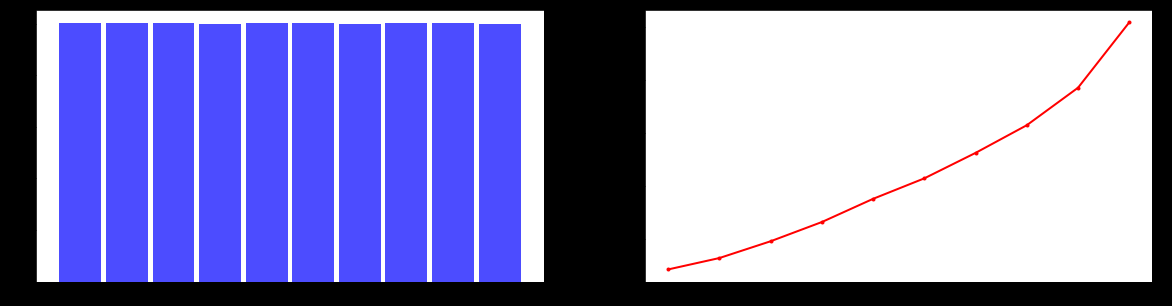

In [0]:
#canvas 생성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.patch.set_facecolor('xkcd:black')

#x축을 구성할 값을 생성합니다. dti를 이용합시다.
xs_tmp = list(grp_df['dti'].values)
xs = list()
for x in xs_tmp:
  xs.append(str(x))
  
#구성비 graph
axes[0].bar(xs, height=grp_df['ratio'].values, color='b', width=0.9, align='center', alpha=0.7,)
#부도율 graph
axes[1].plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)

두 그래프를 한 도면에 나타내고 싶습니다. twinx로 x축을 공유해봅시다.

##seaborn